In [1]:
import numpy as np
import pandas as pd
import nltk
import warnings
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/JordanVencel/DFProject/main/Processed_Data.csv")
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\xxran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Unnamed: 0,row_id,tweet,sentiment_type,sentiment_score
0,0,1,i have six of them still live at home being h...,compound,-0.4767
1,1,2,then go for your dozen kids you are just missi...,compound,-0.2960
2,2,3,about buying a country you could turn it in...,compound,0.5267
3,3,4,actual receipts and yet you havent asked anyon...,compound,0.4404
4,4,5,tesla wall battery for the save power went out...,compound,0.2732


In [2]:
# Set class_score to 1 if greater than .05 (positive).
# to -1 if less that -0.05 (negative)
# to 0 else (neutral)
def categorise(row):
  if row['sentiment_score'] > .05:
    return 'Positive'
  elif row['sentiment_score'] < -.05:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df.apply(lambda row: categorise(row), axis=1)
df.head()

,Unnamed: 0,row_id,tweet,sentiment_type,sentiment_score,sentiment
0,0,1,i have six of them still live at home being h...,compound,-0.4767,Negative
1,1,2,then go for your dozen kids you are just missi...,compound,-0.2960,Negative
2,2,3,about buying a country you could turn it in...,compound,0.5267,Positive
3,3,4,actual receipts and yet you havent asked anyon...,compound,0.4404,Positive
4,4,5,tesla wall battery for the save power went out...,compound,0.2732,Positive


In [3]:
import re
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
    
df['tweet'] = df['tweet'].apply(lambda x: cleaning_numbers(x))
df['tweet'].tail()

7353    elon musk liked a tweet from whole mars catalo...
7354    dude only said he is buying twitter to sell  b...
7355                                   give me your tesla
7356    chick fil a should definitely go public they s...
7357                   fossil fuels like coal natural gas
Name: tweet, dtype: object

In [4]:
#df['tweet'] = df['tweet'].apply(lambda x: x.split())

In [5]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    tweet = [lm.lemmatize(word) for word in data]
    return data
    
df['tweet'] = df['tweet'].apply(lambda x: lemmatizer_on_text(x))
df['tweet'].head()

0    i have six  of them still live at home being h...
1    then go for your dozen kids you are just missi...
2    about buying a country    you could turn it in...
3    actual receipts and yet you havent asked anyon...
4    tesla wall battery for the save power went out...
Name: tweet, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

X = df.tweet
y = df.sentiment

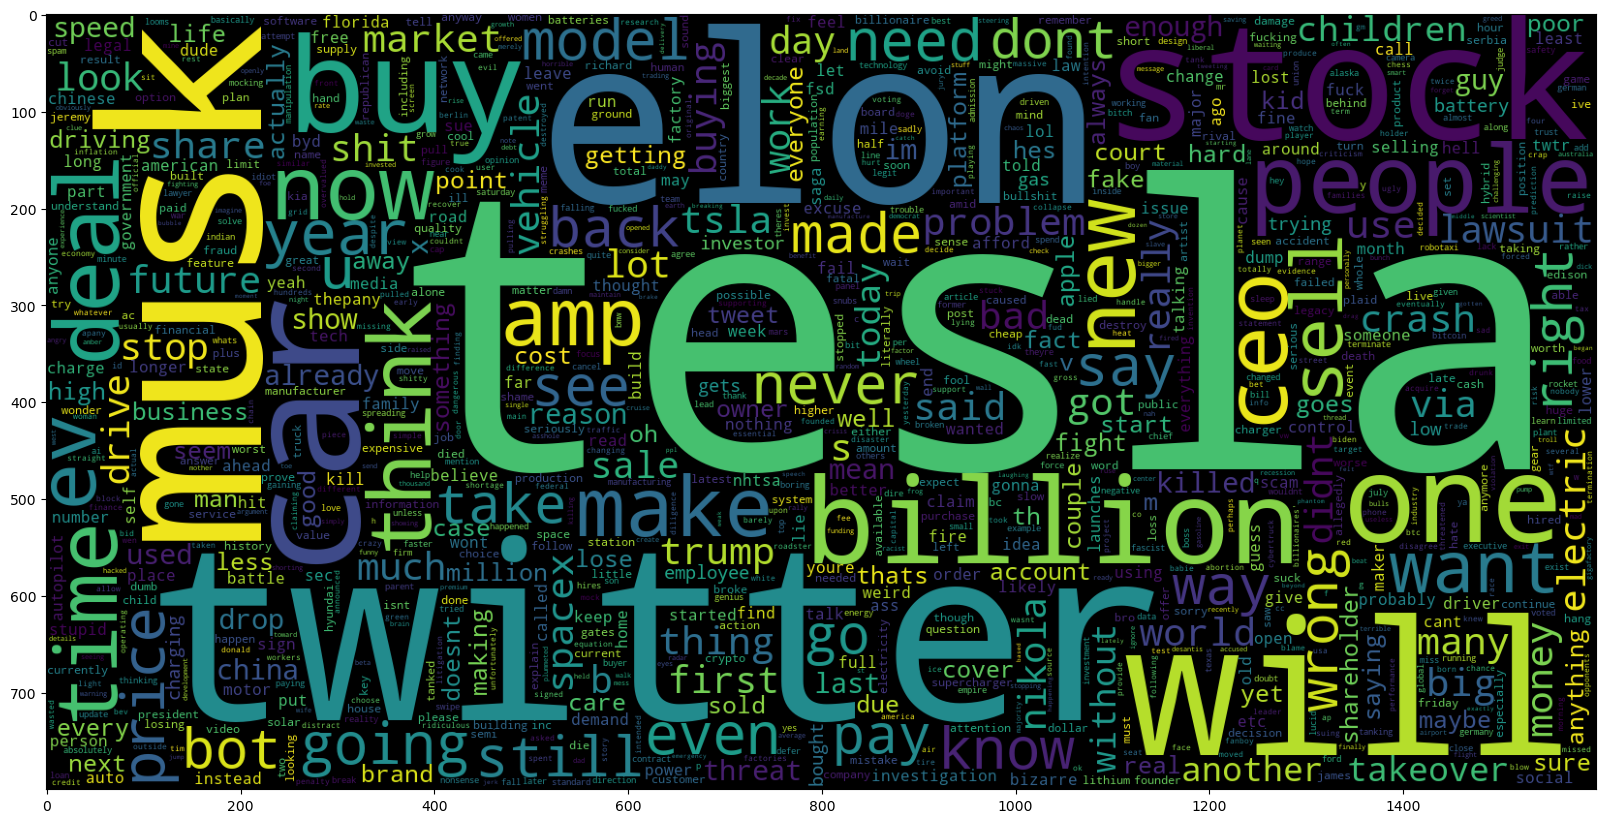

In [12]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

neg_df = df.loc[df['sentiment'] == 'Negative'] 

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_df['tweet']))
plt.imshow(wc)

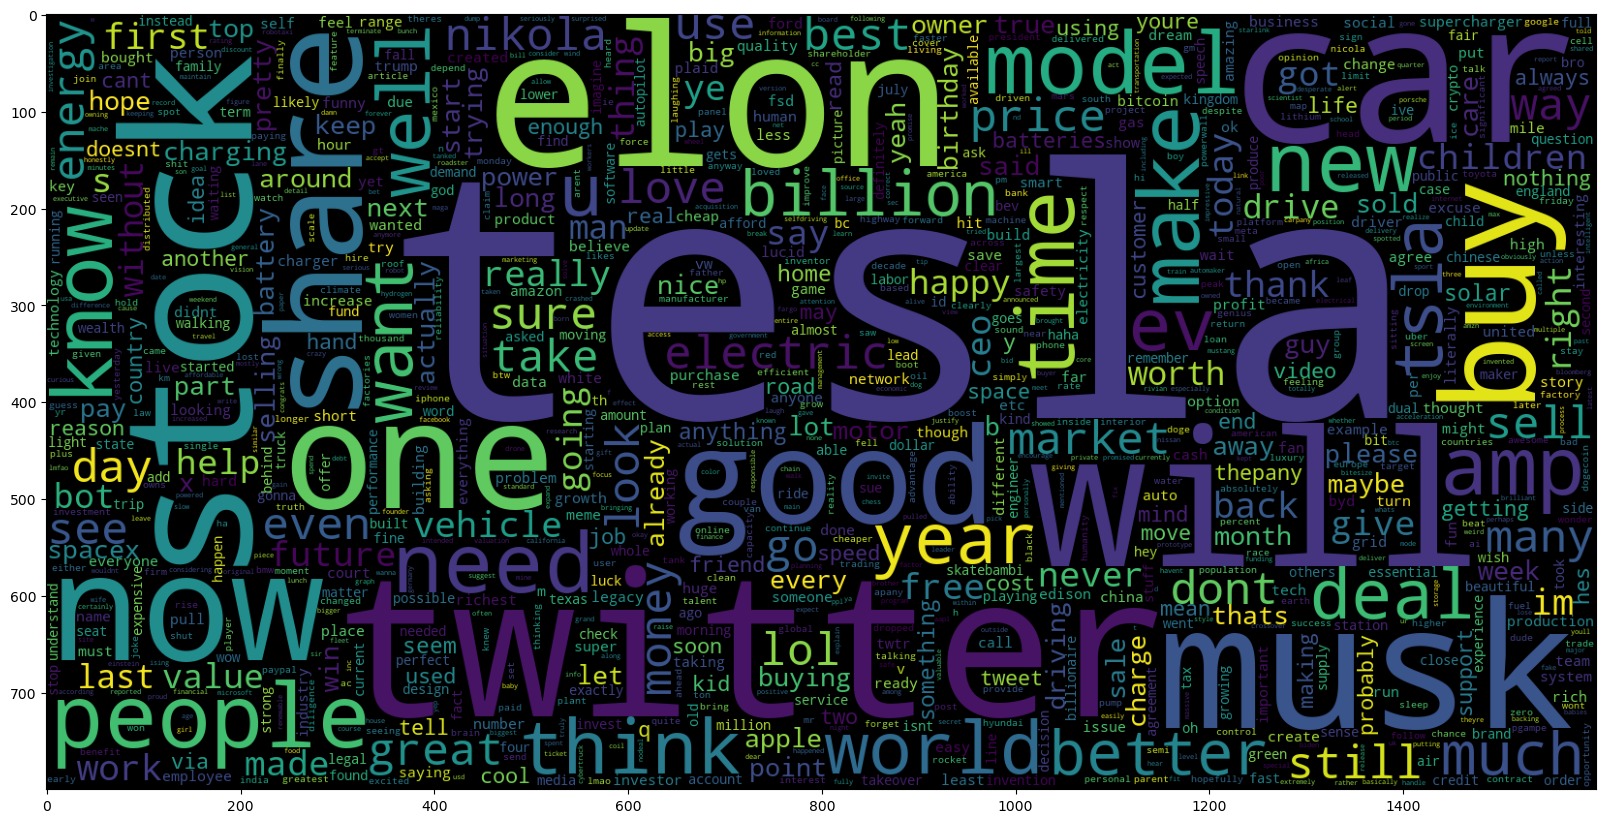

In [13]:
pos_df = df.loc[df['sentiment'] == 'Positive'] 

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pos_df['tweet']))
plt.imshow(wc)

In [ ]:
neutral_df = df.loc[df['sentiment'] == 'Neutral'] 

plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neutral_df['tweet']))
plt.imshow(wc)

In [15]:
from gensim.models import Word2Vec, FastText
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
#w2v = Word2Vec(X, min_count=5, vector_size=200, window=5, sg = 1, hs=0, workers=32, seed=34, negative=10)
#w2v.train(X_train, total_examples=len(df['tweet']), epochs=20)



No. of feature_words:  87748


In [16]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)